# Task 1: Data Preparation

## Loading Data

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv')


### Data overview

In [2]:
# Display the first few rows of the dataset
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
missing_values = data.isnull().sum()
missing_values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
missing_values[missing_values > 0]

person_emp_length     895
loan_int_rate        3116
dtype: int64

The dataset has missing values in the following columns:

- person_emp_length: 895 missing values.
- loan_int_rate: 3,116 missing values

Checking data types and descriptive statistics

- Numerical features:
    - Features like `person_age`, `person_income`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, and `cb_person_cred_hist_length` are numerical.
    - `person_emp_length` has missing values and an unusually high maximum value (123), indicating possible data entry errors or outliers.
    - `loan_status` is our target variable (0: non-default, 1: default).

Categorical Features:

- Features like person_home_ownership, loan_intent, loan_grade, and cb_person_default_on_file are categorical.

### Check distribution of the target variable and feature distributions

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


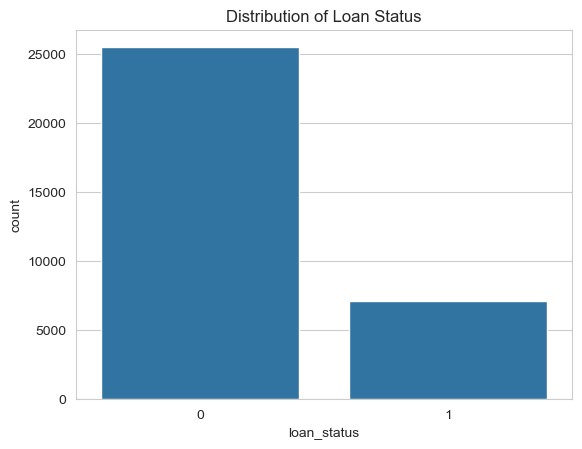

In [9]:
sns.countplot(x=data['loan_status'])
plt.title('Distribution of Loan Status')
plt.show()

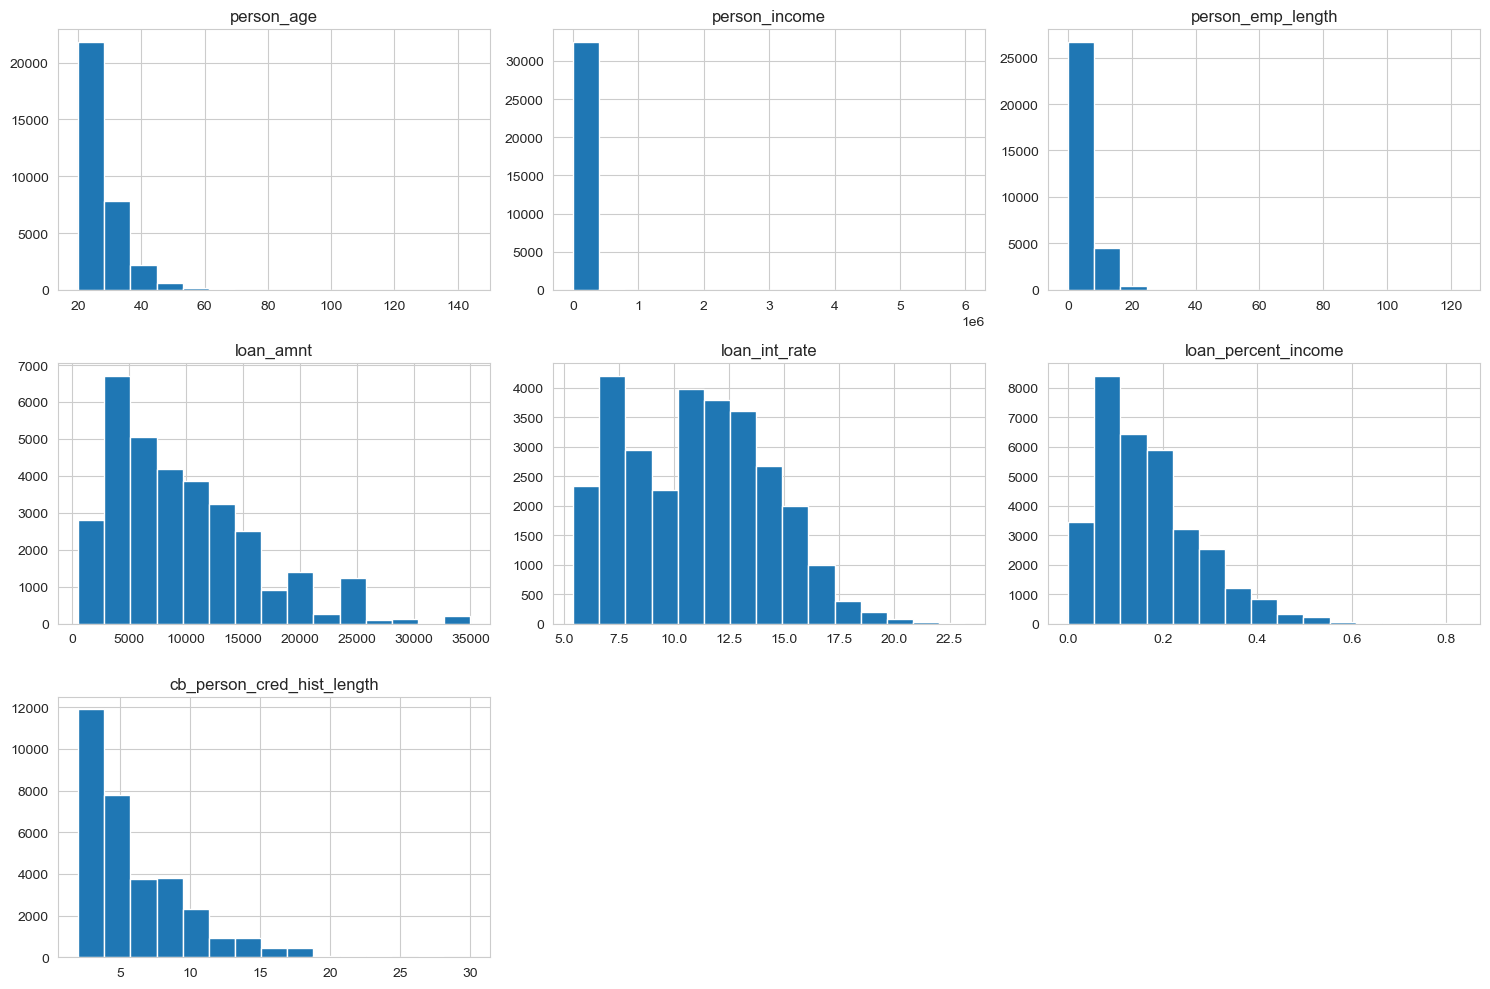

In [10]:

numerical_features = ['person_age', 'person_income', 'person_emp_length',
                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                      'cb_person_cred_hist_length']

data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


### Observations on Numerical Features:

1. Target variable distribution
    - The target variable loan_status is imbalanced. There are more non-default (0) cases than default (1). This indicates that we need to handle class imbalance during modeling.
2. Numerical feature distributions
    - person_age: Generally normally distributed, but with a possible outlier at age 144.
    - person_income: Highly skewed with a few extreme values; income reaches up to 6 million, which seems unrealistic for most cases and could indicate outliers.
    - person_emp_length: Right-skewed with potential outliers, such as employment lengths over 100 years.
    - loan_amnt: Fairly normal distribution.
    - loan_int_rate: Normal distribution but with some missing values to be addressed.
    - loan_percent_income: Right-skewed.
    - cb_person_cred_hist_length: Mostly normal distribution with some long credit histories.

### Solution

- Handle Missing Values: Impute person_emp_length and loan_int_rate using median or predictive modeling.
- Handle Outliers: Use clipping, log transformation, or robust methods for skewed distributions like person_income and outliers in person_age and person_emp_length.
- Encode Categorical Features: Use One-Hot Encoding or Label Encoding for person_home_ownership, loan_intent, loan_grade, and cb_person_default_on_file.
- Address Class Imbalance: Apply resampling techniques or adjust class weights during model training.
- Feature Scaling: Apply scaling techniques (StandardScaler or MinMaxScaler) for numerical features, especially for models sensitive to feature scale


person_home_ownership value counts:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


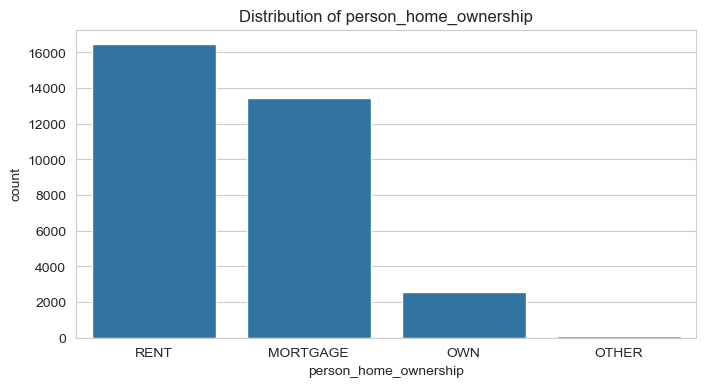


loan_intent value counts:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


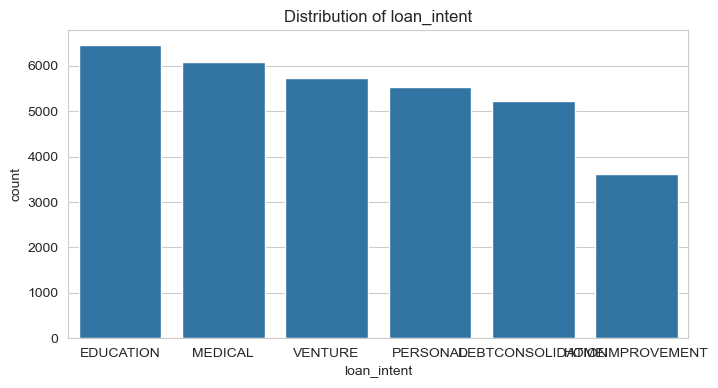


loan_grade value counts:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


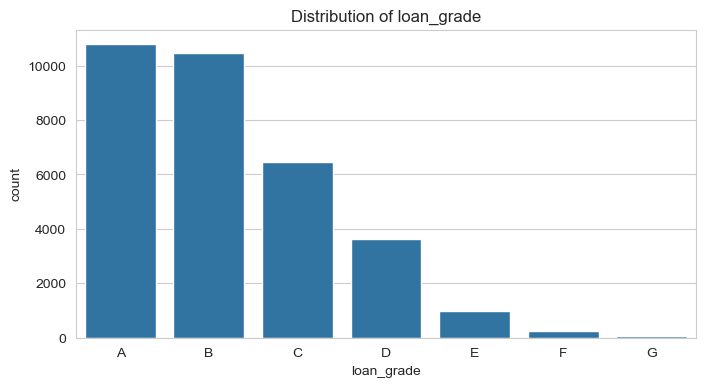


cb_person_default_on_file value counts:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


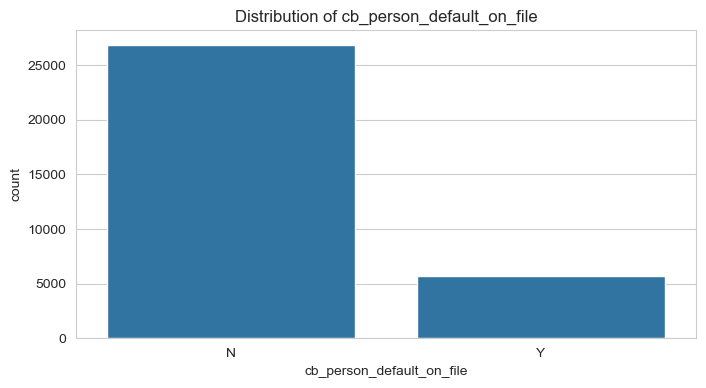

In [11]:
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for feature in categorical_features:
    print(f"\n{feature} value counts:")
    print(data[feature].value_counts())

    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.show()


### Observations on Categorical Features:

1. `person_home_ownership`:
    - Most applicants are renting (RENT) or have a mortgage (MORTGAGE), with fewer owning (OWN) or having other statuses (OTHER).

2. `loan_intent`:
    - The most common reasons for loans are education, medical, and venture purposes. Each category seems well-represented.

3. `loan_grade`:
- The grades range from A to G, with A and B being the most frequent. Lower grades (F, G) have fewer samples, which might indicate lower-risk applicants are more common.

4. `cb_person_default_on_file`:
- Indicates whether an applicant has a history of default ('Y' or 'N'). The majority of applicants do not have a default history (N).

### Solution

1. Handling Missing Values:
- Impute person_emp_length and loan_int_rate using median or use predictive models based on correlated features.

2. Handling Outliers:
- Apply techniques like log transformation or clipping for features like person_income and person_emp_length to manage extreme values.

3. Encoding Categorical Variables:
- Use One-Hot Encoding for person_home_ownership, loan_intent, and loan_grade since these are nominal features.
- cb_person_default_on_file can be binary encoded (0 for 'N' and 1 for 'Y').

4. Scaling Numerical Features:
- Apply scaling (e.g., StandardScaler or MinMaxScaler) for numerical features to normalize the range, especially for algorithms sensitive to scaling.

5. Addressing Class Imbalance:
- Use techniques like SMOTE, Random Under-Sampling, or adjusting class weights to balance the target variable (loan_status).

6. Feature Engineering:
- Create new features from existing ones if necessary (e.g., interaction terms, binning continuous variables, or using domain knowledge).

# Data Preprocessing

1. Handling Missing Values
2. Handling Outliers
3. Encoding Categorical Variables
4. Scaling Numerical Features
5. Addressing Class Imbalance

### 1. Handling Missing Values

The columns person_emp_length and loan_int_rate have missing values. We'll handle these using the median because it is robust to outliers.



In [14]:
data = data.fillna({'person_emp_length': data['person_emp_length'].median(),
                    'loan_int_rate': data['loan_int_rate'].median()})


### 2. Handling Outliers

In [17]:
import numpy as np

# Log transformation for person_income to handle skewness
data['person_income'] = data['person_income'].apply(lambda x: np.log(x) if x > 0 else 0)

# Clipping outliers for person_emp_length
emp_length_upper_limit = data['person_emp_length'].quantile(0.99)
data['person_emp_length'] = np.clip(data['person_emp_length'], 0, emp_length_upper_limit)

# Clipping outliers for person_age
data['person_age'] = np.clip(data['person_age'], 20, 90)


### 3. Encoding Categorical Variables

In [18]:
# One-Hot Encoding for nominal features
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

# Binary Encoding for cb_person_default_on_file
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'N': 0, 'Y': 1})


### 4. Scaling Numerical Features

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of numerical features to scale
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Scaling numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])


### 5. Handling Class Imbalance

In [22]:
from imblearn.over_sampling import SMOTE

# Features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the balance of the target variable after SMOTE
print(y_resampled.value_counts())


loan_status
1    25473
0    25473
Name: count, dtype: int64


# Task 2 Modelling

## 1. Split Data for Training, Validation, and Testing

- Training Set: Used to train the model.
- Validation Set: Used to fine-tune the model and adjust hyperparameters.
- Test Set: Used to evaluate the model's performance on unseen data.

In [23]:
from sklearn.model_selection import train_test_split

# Split data into training + validation and test sets (80-20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Further split training + validation set into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Print the sizes of each split
print(f"Training Set: {X_train.shape}, Validation Set: {X_val.shape}, Test Set: {X_test.shape}")


Training Set: (32604, 22), Validation Set: (8152, 22), Test Set: (10190, 22)


## 2. Define Metrics for Evaluation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")



## 3. Define Baseline Model and Calculate Baseline Score

In [26]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
baseline_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = baseline_model.predict(X_val)

# Evaluate the baseline model
print("Baseline Model Metrics (Logistic Regression):")
print_metrics(y_val, y_val_pred)


Baseline Model Metrics (Logistic Regression):
Accuracy: 0.8122
Precision: 0.8135
Recall: 0.8105
F1-Score: 0.8120


- The model correctly classifies 81.22% (in proportion of correctly predicted instances both true positives and true negatives) of the loan applicants. However, since we know that the dataset is imbalanced, this is too early to tell and could mislead.
- Of all the applicants that the model predicted as "default," 81.35% were actually "default."
- Of all the actual "default" cases, the model correctly identifies 81.05% of them
- The baseline Logistic Regression model has reasonably good performance across all metrics. However, there is room for improvement, especially considering this is a straightforward model without any tuning or feature engineering.
- The F1-Score being close to Precision and Recall suggests a balanced trade-off between identifying actual defaults and minimizing the misclassification of non-defaults.


### Trying to tune hyperparameter for logistic regression to see if can yield better result

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Norm used in penalization
    'solver': ['liblinear', 'saga']  # Solver to use
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [28]:
# Get the best model from the grid search
best_log_reg = grid_search.best_estimator_

# Predict on the validation set using the best model
y_val_pred_tuned = best_log_reg.predict(X_val)

# Evaluate the tuned model
print("Tuned Model Metrics (Logistic Regression):")
print_metrics(y_val, y_val_pred_tuned)


Tuned Model Metrics (Logistic Regression):
Accuracy: 0.8105
Precision: 0.8119
Recall: 0.8085
F1-Score: 0.8102


- The metrics after hyperparameter tuning are nearly identical to the baseline model's metrics. This suggests that the hyperparameters for Logistic Regression are already reasonably optimal or that tuning doesn't significantly impact the model's performance for this dataset.
- Logistic Regression is a linear model, and its performance is often limited to linearly separable data. If the dataset has more complex patterns that a linear model cannot capture, more complex models may perform better.

### Trying Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 